In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mwinilunga zm
zaozerne ua
new norfolk au
tual id
koster za
humaita br
hastings gb
mayumba ga
opotiki nz
carnarvon au
katherine au
pedernales ec
port elizabeth za
kapaa us
bathsheba bb
eureka us
tuktoyaktuk ca
butaritari ki
jacareacanga br
jamestown sh
saint-joseph re
zhigansk ru
samusu ws
kalmunai lk
ribeira grande pt
faanui pf
mataura pf
tadine nc
kodiak us
punta arenas cl
mar del plata ar
lebu cl
visnes no
mahebourg mu
san francisco del mar mx
avera pf
hobart au
hithadhoo mv
fortuna us
paris us
tayshet ru
busselton au
lolua tv
santa marta co
buluang ph
novikovo ru
saint-philippe re
faanui pf
maine-soroa ne
kodiak us
punta arenas cl
yellowknife ca
barrow us
marathon us
qarqin af
sitka us
majene id
faanui pf
margate za
castro cl
albany au
luderitz na
mantsala fi
thompson ca
jamestown sh
tiksi ru
rikitea pf
jamestown sh
new norfolk au
kodiak us
slave lake ca
naze jp
rikitea pf
atuona pf
punta arenas cl
bluff nz
jamestown sh
belen us
torbay ca
bathsheba bb
andrews us
bethel us
dikson ru


barentsburg sj
taolanaro mg
nome us
mataura pf
turukhansk ru
inongo cd
rikitea pf
sao jose da coroa grande br
cansilayan ph
tuktoyaktuk ca
tasiilaq gl
ushuaia ar
port hardy ca
sao joao da barra br
bluff nz
saint-philippe re
linchuan cn
qaqortoq gl
klaksvik fo
punta arenas cl
atuona pf
timbiqui co
souillac mu
dorchester gb
tingi tz
thompson ca
hilo us
tuggurt dz
ribeira grande pt
busselton au
mar del plata ar
qaqortoq gl
vaini to
uravakonda in
hasaki jp
cabedelo br
kontagora ng
rathdrum us
belmonte br
santa maria cv
albany au
kavieng pg
shimoda jp
mataura pf
cherskiy ru
east london za
tessalit ml
saldanha za
meyungs pw
busselton au
roald no
shahr-e kord ir
butaritari ki
attawapiskat ca
cape town za
ushuaia ar
barrow us
ushuaia ar
ushuaia ar
castro cl
severo-kurilsk ru
altay cn
kropotkin ru
mataura pf
geraldton au
hilo us
arraial do cabo br
albany au
hobart au
chara ru
okha ru
dikson ru
hermanus za
coos bay us
rikitea pf
haines junction ca
cherskiy ru
guerrero negro mx
portland au
adrar 

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# weather_api_key

'38d9019c481b5b784ae5d2d256b31620'

In [11]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=38d9019c481b5b784ae5d2d256b31620


In [12]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [13]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 13 | mwinilunga
Processing Record 2 of Set 13 | zaozerne
Processing Record 3 of Set 13 | new norfolk
Processing Record 4 of Set 13 | tual
Processing Record 5 of Set 13 | koster
Processing Record 6 of Set 13 | humaita
Processing Record 7 of Set 13 | hastings
Processing Record 8 of Set 13 | mayumba
Processing Record 9 of Set 13 | opotiki
Processing Record 10 of Set 13 | carnarvon
Processing Record 11 of Set 13 | katherine
Processing Record 12 of Set 13 | pedernales
Processing Record 13 of Set 13 | port elizabeth
Processing Record 14 of Set 13 | kapaa
Processing Record 15 of Set 13 | bathsheba
Processing Record 16 of Set 13 | eureka
Processing Record 17 of Set 13 | tuktoyaktuk
Processing Record 18 of Set 13 | butaritari
Processing Record 19 of Set 13 | jacareacanga
Processing Record 20 of Set 13 | jamestown
Processing Record 21 of Set 13 | saint-joseph
Processing Record 22 of Set 13 | zhigansk
Processin

Processing Record 37 of Set 16 | fort nelson
Processing Record 38 of Set 16 | port lincoln
Processing Record 39 of Set 16 | belushya guba
City not found. Skipping...
Processing Record 40 of Set 16 | longyearbyen
Processing Record 41 of Set 16 | warah
Processing Record 42 of Set 16 | kivertsi
Processing Record 43 of Set 16 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 16 | puerto del rosario
Processing Record 45 of Set 16 | cabedelo
Processing Record 46 of Set 16 | klaksvik
Processing Record 47 of Set 16 | malayal
Processing Record 48 of Set 16 | roald
Processing Record 49 of Set 16 | avarua
Processing Record 50 of Set 16 | abu zabad
Processing Record 1 of Set 17 | kavaratti
Processing Record 2 of Set 17 | natal
Processing Record 3 of Set 17 | alberton
Processing Record 4 of Set 17 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 17 | saskylakh
Processing Record 6 of Set 17 | hamilton
Processing Record 7 of Set 17 | khatanga
Processing Record 8 o

Processing Record 21 of Set 20 | ilinskiy
Processing Record 22 of Set 20 | babanusah
City not found. Skipping...
Processing Record 23 of Set 20 | port said
Processing Record 24 of Set 20 | jerome
Processing Record 25 of Set 20 | lazaro cardenas
Processing Record 26 of Set 20 | faya
Processing Record 27 of Set 20 | burnie
Processing Record 28 of Set 20 | gornyy
Processing Record 29 of Set 20 | ambulu
Processing Record 30 of Set 20 | belaya gora
Processing Record 31 of Set 20 | kathmandu
Processing Record 32 of Set 20 | esperance
Processing Record 33 of Set 20 | mokhsogollokh
Processing Record 34 of Set 20 | tocopilla
Processing Record 35 of Set 20 | grand river south east
City not found. Skipping...
Processing Record 36 of Set 20 | tomatlan
Processing Record 37 of Set 20 | russell
Processing Record 38 of Set 20 | kirakira
Processing Record 39 of Set 20 | maracacume
Processing Record 40 of Set 20 | pytalovo
Processing Record 41 of Set 20 | rocha
Processing Record 42 of Set 20 | hobyo
Pro

Processing Record 6 of Set 24 | madang
Processing Record 7 of Set 24 | gondanglegi
Processing Record 8 of Set 24 | wawa
Processing Record 9 of Set 24 | muncar
Processing Record 10 of Set 24 | araxa
Processing Record 11 of Set 24 | prince rupert
Processing Record 12 of Set 24 | ixtapa
Processing Record 13 of Set 24 | gravdal
Processing Record 14 of Set 24 | yangambi
Processing Record 15 of Set 24 | te karaka
Processing Record 16 of Set 24 | buraydah
Processing Record 17 of Set 24 | mount isa
Processing Record 18 of Set 24 | provideniya
Processing Record 19 of Set 24 | dubenskiy
City not found. Skipping...
Processing Record 20 of Set 24 | rio grande
Processing Record 21 of Set 24 | uyemskiy
Processing Record 22 of Set 24 | dwarka
Processing Record 23 of Set 24 | fairbanks
Processing Record 24 of Set 24 | grafton
Processing Record 25 of Set 24 | wichita falls
Processing Record 26 of Set 24 | aanekoski
Processing Record 27 of Set 24 | flagstaff
Processing Record 28 of Set 24 | gizo
Process

In [28]:
len(city_data)

571

In [31]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mwinilunga,-11.7358,24.4293,57.25,54,1,4.36,ZM,2021-08-01 22:26:05
1,Zaozerne,45.1582,33.2787,72.95,68,0,3.09,UA,2021-08-01 22:26:05
2,New Norfolk,-42.7826,147.0587,38.70,84,20,2.46,AU,2021-08-01 22:26:05
3,Tual,-5.6667,132.7500,81.27,78,53,12.17,ID,2021-08-01 22:26:06
4,Koster,-25.8630,26.8976,46.17,28,1,7.85,ZA,2021-08-01 22:26:06
5,Humaita,-7.5061,-63.0208,85.33,35,5,3.20,BR,2021-08-01 22:26:06
6,Hastings,50.8552,0.5729,61.29,99,51,5.48,GB,2021-08-01 22:24:19
7,Mayumba,-3.4320,10.6554,74.03,84,99,7.58,GA,2021-08-01 22:26:07
8,Opotiki,-38.0833,177.2833,51.39,59,43,2.84,NZ,2021-08-01 22:26:07
9,Carnarvon,-24.8667,113.6333,48.27,66,0,10.36,AU,2021-08-01 22:25:16


In [32]:
city_data_df.columns

Index(['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness',
       'Wind Speed', 'Country', 'Date'],
      dtype='object')

In [33]:
new_column_order = ['City','Country','Date', 'Lat', 'Lng','Max Temp','Humidity', 'Cloudiness','Wind Speed']

In [34]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mwinilunga,ZM,2021-08-01 22:26:05,-11.7358,24.4293,57.25,54,1,4.36
1,Zaozerne,UA,2021-08-01 22:26:05,45.1582,33.2787,72.95,68,0,3.09
2,New Norfolk,AU,2021-08-01 22:26:05,-42.7826,147.0587,38.70,84,20,2.46
3,Tual,ID,2021-08-01 22:26:06,-5.6667,132.7500,81.27,78,53,12.17
4,Koster,ZA,2021-08-01 22:26:06,-25.8630,26.8976,46.17,28,1,7.85
...,...,...,...,...,...,...,...,...,...
566,Rabaul,PG,2021-08-01 22:28:15,-4.1967,152.1721,79.79,81,12,11.92
567,Lodja,CD,2021-08-01 22:28:15,-3.4833,23.4333,73.71,35,87,1.16
568,Cedar Rapids,US,2021-08-01 22:24:39,42.0083,-91.6441,80.10,50,20,5.01
569,Flinders,AU,2021-08-01 22:25:54,-34.5833,150.8552,49.05,91,6,1.01


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [36]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mwinilunga,ZM,2021-08-01 22:26:05,-11.7358,24.4293,57.25,54,1,4.36
1,Zaozerne,UA,2021-08-01 22:26:05,45.1582,33.2787,72.95,68,0,3.09
2,New Norfolk,AU,2021-08-01 22:26:05,-42.7826,147.0587,38.70,84,20,2.46
3,Tual,ID,2021-08-01 22:26:06,-5.6667,132.7500,81.27,78,53,12.17
4,Koster,ZA,2021-08-01 22:26:06,-25.8630,26.8976,46.17,28,1,7.85
...,...,...,...,...,...,...,...,...,...
566,Rabaul,PG,2021-08-01 22:28:15,-4.1967,152.1721,79.79,81,12,11.92
567,Lodja,CD,2021-08-01 22:28:15,-3.4833,23.4333,73.71,35,87,1.16
568,Cedar Rapids,US,2021-08-01 22:24:39,42.0083,-91.6441,80.10,50,20,5.01
569,Flinders,AU,2021-08-01 22:25:54,-34.5833,150.8552,49.05,91,6,1.01


In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [38]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1627857954.4163277

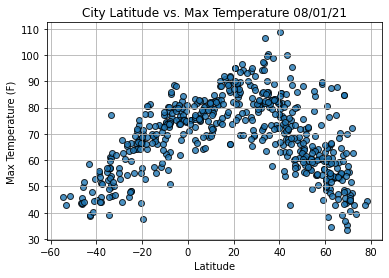

In [39]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

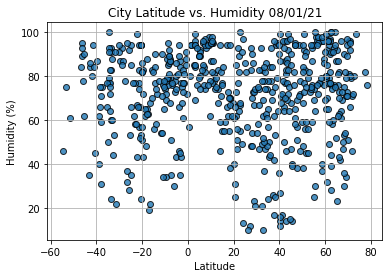

In [40]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

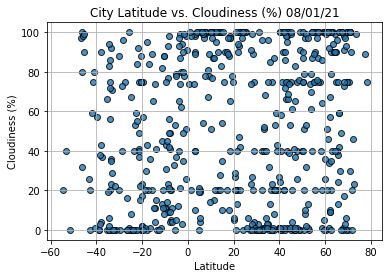

In [41]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

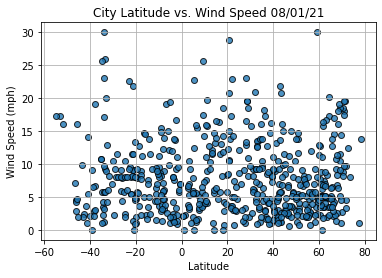

In [42]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()